In [1]:
import time

# Start timing the entire notebook
notebook_start_time = time.time()

In [2]:
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from scipy.signal import resample

import warnings
warnings.filterwarnings("ignore")


In [3]:
pip install tqdm_joblib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install antropy

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Alzheimer's EEG files (Filtered Derivatives)
alzheimer_files = [
    '/kaggle/input/alzheimerderivatives/sub-001_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-002_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-003_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-004_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-005_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-006_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-007_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-008_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-009_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-010_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-011_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-012_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-013_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-014_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-015_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-016_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-017_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-018_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-019_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-020_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-021_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-022_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-023_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-024_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-025_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-026_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-027_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-028_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-029_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-030_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-031_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-032_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-033_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-034_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-035_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-036_task-eyesclosed_eeg.set',

]

# Normal EEG files (Filtered Derivatives)
normal_files = [
    '/kaggle/input/alzheimerderivatives/sub-037_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-038_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-039_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-040_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-041_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-042_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-043_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-044_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-045_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-046_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-047_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-048_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-049_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-050_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-051_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-052_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-053_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-054_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-055_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-056_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-057_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-058_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-059_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-060_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-061_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-062_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-063_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-064_task-eyesclosed_eeg.set',
    # '/kaggle/input/alzheimerderivatives/sub-065_task-eyesclosed_eeg.set',
]

# Dementia EEG files (Filtered Derivatives)
dementia_files = [
    '/kaggle/input/alzheimerderivatives/sub-066_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-067_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-068_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-069_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-070_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-071_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-072_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-073_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-074_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-075_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-076_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-077_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-078_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-079_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-080_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-081_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-082_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-083_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-084_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-085_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-086_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-087_task-eyesclosed_eeg.set',
    '/kaggle/input/alzheimerderivatives/sub-088_task-eyesclosed_eeg.set',
 ]
print("done")

done


In [6]:
import numpy as np
import mne

patients = np.concatenate([alzheimer_files, normal_files, dementia_files])

labels = np.concatenate([
    np.full(len(alzheimer_files), 'alzheimer'),
    np.full(len(normal_files), 'normal'),
    np.full(len(dementia_files), 'dementia')
])

In [7]:
print(f"Total number of patients: {len(patients)}")
unique_labels, label_counts = np.unique(labels, return_counts=True)

# Print number of occurrences for each label
for label, count in zip(unique_labels, label_counts):
    print(f"{label}: {count}")

Total number of patients: 69
alzheimer: 23
dementia: 23
normal: 23


In [8]:
import numpy as np
import mne
import os

# Load recordings
recordings, durations = [], []
for file_path in patients:
    eeg_data = mne.io.read_raw_eeglab(file_path, preload=True)
    recordings.append(eeg_data)
    durations.append(eeg_data.times[-1])

# Crop recordings to the shortest duration
min_duration = min(durations)
cropped_recordings = [eeg.copy().crop(tmin=0, tmax=min_duration) for eeg in recordings]

# Preprocess EEG data with band-specific filtering
def preprocess_eeg(raw, channels, l_freq, h_freq):
    raw.set_eeg_reference('average', projection=False)
    raw.filter(l_freq, h_freq, fir_design='firwin', verbose=False)
    return raw.pick_channels(channels)

# Define frequency bands
frequency_bands = {
    # 'delta': (0.5, 4),
    'theta': (4, 8),
    # 'alpha': (8, 13),
    # 'beta': (13, 30),
    # 'gamma': (30, 45)
}

# Select EEG channels
selected_channels=['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']

# Directory to save band-specific data
output_dir = "eeg_segments"
os.makedirs(output_dir, exist_ok=True)

# Process bands sequentially and save data to disk
time_duration = 5  # in seconds

for band_name, (l_freq, h_freq) in frequency_bands.items():
    print(f"Processing band: {band_name}")
    
    band_data = []
    band_labels = []
    
    for raw, label in zip(cropped_recordings, labels):
        # Preprocess the data for the current band
        processed_raw = preprocess_eeg(raw.copy(), selected_channels, l_freq, h_freq)
        
        # Segment the data
        sfreq = processed_raw.info['sfreq']
        segment_samples = int(time_duration * sfreq)
        total_samples = processed_raw.n_times
        
        for start in range(0, total_samples, segment_samples):
            end = start + segment_samples
            if end > total_samples:
                break
            segment = processed_raw.copy().crop(tmin=start / sfreq, tmax=(end - 1) / sfreq)
            band_data.append(segment.get_data())
            band_labels.append(label)
    
    # Save band data and labels as separate files
    np.save(os.path.join(output_dir, f"band_data.npy"), band_data)
    np.save(os.path.join(output_dir, f"band_labels.npy"), band_labels)
    
    print(f"Saved {band_name} data and labels to {output_dir}")


Processing band: theta
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selec

In [9]:
import numpy as np

# Load Delta Band
alpha_data = np.load("eeg_segments/band_data.npy", allow_pickle=True)
alpha_labels = np.load("eeg_segments/band_labels.npy", allow_pickle=True)
print(f"alpha_data Shape: {len(alpha_data)} segments")
print(f"alpha_labels Shape: {len(alpha_labels)} labels")

alpha_data Shape: 6555 segments
alpha_labels Shape: 6555 labels


In [10]:
alpha_data.shape

(6555, 19, 2500)

In [11]:
# import numpy as np
# import pandas as pd
# from scipy.stats import kurtosis, skew
# from scipy.signal import welch
# from joblib import Parallel, delayed

# def extract_features(channel_data, sampling_rate):
#     """
#     Extract time-domain and frequency-domain features for a single channel.
#     """
#     mean = np.mean(channel_data)
#     variance = np.var(channel_data)
#     std_dev = np.std(channel_data)
#     rms = np.sqrt(np.mean(channel_data**2))
#     skewness = skew(channel_data)
#     kurt = kurtosis(channel_data)

#     _, power_spectrum = welch(channel_data, fs=sampling_rate, nperseg=len(channel_data))
#     avg_power = np.mean(power_spectrum)

#     return [
#         mean, variance, std_dev, rms, skewness, kurt, avg_power
#     ]

# def extract_features_parallel(data, sampling_rate=500, n_jobs=-1):

#     def process_segment(segment):
#         return np.hstack([
#             extract_features(segment[channel], sampling_rate) for channel in range(segment.shape[0])
#         ])

#     features = Parallel(n_jobs=n_jobs)(
#         delayed(process_segment)(data[segment]) for segment in range(data.shape[0])
#     )

#     column_names = [
#         f"Ch_{channel}_{feature}"
#         for channel in range(data.shape[1])
#         for feature in ["Mean", "Variance", "StdDev", "RMS", "Skewness", "Kurtosis", "AvgPower"]
#     ]

#     return pd.DataFrame(features, columns=column_names)

# # Example usage
# sampling_rate = 500
# linear_features_df = extract_features_parallel(alpha_data, sampling_rate=sampling_rate)

# # Save to CSV
# linear_features_df.to_csv("linear_features.csv", index=False)
# linear_features_df.head()


In [12]:
import numpy as np
import pandas as pd
from scipy.stats import kurtosis, skew
from scipy.signal import welch
from joblib import Parallel, delayed
from antropy import petrosian_fd, lziv_complexity, app_entropy, sample_entropy,hjorth_params
from tqdm_joblib import tqdm_joblib
from tqdm import tqdm

def extract_features(channel_data, sampling_rate):
    """
    Extract time-domain, frequency-domain, Hjorth, and complexity measures for a single EEG channel.
    """
    # Time-domain features
    mean = np.mean(channel_data)
    variance = np.var(channel_data)
    std_dev = np.std(channel_data)
    rms = np.sqrt(np.mean(channel_data**2))
    skewness = skew(channel_data)
    kurt = kurtosis(channel_data)

    # Hjorth Parameters (Now using antropy)
    mobility, complexity = hjorth_params(channel_data)

    # Frequency-domain feature (Power Spectral Density)
    _, power_spectrum = welch(channel_data, fs=sampling_rate, nperseg=min(len(channel_data), 256))
    avg_power = np.mean(power_spectrum)

    # Complexity Measures
    pfd = petrosian_fd(channel_data)
    lzc = lziv_complexity(channel_data, normalize=True)
    apen = app_entropy(channel_data, order=2, metric="chebyshev")  # Approximate Entropy
    sampen = sample_entropy(channel_data)

    return [
        mean, variance, std_dev, rms, skewness, kurt,
        mobility, complexity, avg_power,
        pfd, lzc, apen, sampen
    ]

def extract_features_parallel(data, sampling_rate=500, n_jobs=-1):
    """
    Extract features for all EEG channels in parallel with progress updates.
    """
    def process_segment(segment_idx):
        segment = data[segment_idx]
        result = np.hstack([
            extract_features(segment[channel], sampling_rate) for channel in range(segment.shape[0])
        ])
        print(f"✅ Processed segment {segment_idx + 1}/{data.shape[0]}")  # Update after each segment
        return result

    # Use tqdm to track progress
    features = Parallel(n_jobs=n_jobs)(
        delayed(process_segment)(segment_idx) for segment_idx in tqdm(range(data.shape[0]), desc="Processing EEG Data")
    )

    column_names = [
        f"Ch_{channel}_{feature}"
        for channel in range(data.shape[1])
        for feature in ["Mean", "Variance", "StdDev", "RMS", "Skewness", "Kurtosis",
                        "Hjorth_Mobility", "Hjorth_Complexity", "AvgPower",
                        "PetrosianFD", "LZC", "ApEn", "SampEn"]
    ]

    return pd.DataFrame(features, columns=column_names)

# Example Usage:
sampling_rate = 500
linear_features_df = extract_features_parallel(alpha_data, sampling_rate=sampling_rate)

# Save to CSV
linear_features_df.to_csv("eeg_features.csv", index=False)
print("\n✅ Feature extraction completed. Saved to eeg_features.csv")


Processing EEG Data: 100%|██████████| 6555/6555 [40:39<00:00,  2.69it/s] 



✅ Feature extraction completed. Saved to eeg_features.csv


In [13]:
# import numpy as np
# import pandas as pd
# from scipy.stats import kurtosis, skew
# from scipy.signal import welch
# from joblib import Parallel, delayed

# def extract_features(channel_data, sampling_rate):
#     """
#     Extract time-domain, frequency-domain, and Hjorth parameters for a single channel.
#     """
#     mean = np.mean(channel_data)
#     variance = np.var(channel_data)
#     std_dev = np.std(channel_data)
#     rms = np.sqrt(np.mean(channel_data**2))
#     skewness = skew(channel_data)
#     kurt = kurtosis(channel_data)

#     diff1 = np.diff(channel_data)
#     diff2 = np.diff(diff1)
#     activity = variance
#     mobility = np.sqrt(np.var(diff1) / activity)
#     complexity = np.sqrt(np.var(diff2) / np.var(diff1)) / mobility

#     _, power_spectrum = welch(channel_data, fs=sampling_rate, nperseg=len(channel_data))
#     avg_power = np.mean(power_spectrum)

#     return [
#         mean, variance, std_dev, rms, skewness, kurt,
#         mobility, complexity, avg_power
#     ]

# def extract_features_parallel(data, sampling_rate=500, n_jobs=-1):
  
#     def process_segment(segment):
#         return np.hstack([
#             extract_features(segment[channel], sampling_rate) for channel in range(segment.shape[0])
#         ])

#     features = Parallel(n_jobs=n_jobs)(
#         delayed(process_segment)(data[segment]) for segment in range(data.shape[0])
#     )

#     column_names = [
#         f"Ch_{channel}_{feature}"
#         for channel in range(data.shape[1])
#         for feature in ["Mean", "Variance", "StdDev", "RMS", "Skewness", "Kurtosis",
#                         "Hjorth_Mobility", "Hjorth_Complexity", "AvgPower"]
#     ]

#     return pd.DataFrame(features, columns=column_names)

# # Example usage
# sampling_rate = 500
# linear_features_df = extract_features_parallel(alpha_data, sampling_rate=sampling_rate)

# # Save to CSV
# linear_features_df.to_csv("linear_features.csv", index=False)
# linear_features_df.head()

In [14]:
# Add labels for each patient
linear_features_df['label'] = alpha_labels

In [15]:
linear_features_df

,Ch_0_Mean,Ch_0_Variance,Ch_0_StdDev,Ch_0_RMS,Ch_0_Skewness,Ch_0_Kurtosis,Ch_0_Hjorth_Mobility,Ch_0_Hjorth_Complexity,Ch_0_AvgPower,Ch_0_PetrosianFD,...,Ch_18_Skewness,Ch_18_Kurtosis,Ch_18_Hjorth_Mobility,Ch_18_Hjorth_Complexity,Ch_18_AvgPower,Ch_18_PetrosianFD,Ch_18_LZC,Ch_18_ApEn,Ch_18_SampEn,label
0,1.390175e-07,1.342756e-11,0.000004,0.000004,0.198499,0.137019,0.068047,1.112414,4.829752e-14,1.001202,...,-0.102154,0.318158,0.071689,1.143796,2.837949e-14,1.001304,0.00903,0.295897,0.272096,alzheimer
1,-7.673006e-08,1.193399e-11,0.000003,0.000003,0.038338,0.784040,0.070465,1.119887,4.222191e-14,1.001365,...,-0.069525,0.842880,0.068272,1.157567,3.693528e-14,1.001365,0.00903,0.272953,0.228386,alzheimer
2,2.502775e-08,1.246682e-11,0.000004,0.000004,-0.011978,0.309924,0.068306,1.124273,5.049548e-14,1.001162,...,-0.002925,-0.159894,0.066645,1.123049,4.410041e-14,1.001162,0.00903,0.274474,0.249658,alzheimer
3,-2.279482e-08,2.078616e-11,0.000005,0.000005,-0.110826,0.691835,0.064931,1.131724,9.122268e-14,1.001182,...,0.162003,-0.182584,0.067769,1.110493,6.587568e-14,1.001223,0.00903,0.280074,0.263876,alzheimer
4,-2.913964e-08,4.052006e-11,0.000006,0.000006,-0.069591,2.945233,0.061778,1.166580,1.658256e-13,1.001162,...,0.195941,3.290060,0.059470,1.131530,9.145102e-14,1.001284,0.00903,0.215884,0.149242,alzheimer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6550,-8.278948e-09,5.691453e-12,0.000002,0.000002,-0.091045,-0.552900,0.074697,1.120821,2.253978e-14,1.001365,...,0.098344,-0.317554,0.078585,1.093049,2.430051e-14,1.001385,0.00903,0.334161,0.309852,dementia
6551,1.521783e-09,5.875008e-12,0.000002,0.000002,0.000378,-0.283765,0.080408,1.135111,2.480013e-14,1.001527,...,0.141354,-0.261006,0.079363,1.124668,2.305254e-14,1.001466,0.00903,0.339975,0.319996,dementia
6552,2.518400e-08,1.037803e-11,0.000003,0.000003,-0.056192,0.035649,0.081273,1.084796,3.770604e-14,1.001466,...,0.069539,-0.449281,0.078727,1.107046,2.982137e-14,1.001385,0.00903,0.337273,0.315987,dementia
6553,-4.316511e-08,7.054322e-12,0.000003,0.000003,-0.120590,-0.082017,0.080111,1.135903,2.876149e-14,1.001507,...,0.139554,0.220846,0.085861,1.079969,2.815421e-14,1.001507,0.00903,0.365266,0.316189,dementia


In [16]:
linear_features_df.label.value_counts()

label
alzheimer    2185
normal       2185
dementia     2185
Name: count, dtype: int64

In [17]:
df = linear_features_df.copy()

# Assuming your DataFrame is named df and has a column 'label'
label_mapping = {'alzheimer': 1, 'normal': 0, 'dementia': 2}

# Map the labels to integers
df['label'] = df['label'].map(label_mapping)

In [18]:
df.head()

,Ch_0_Mean,Ch_0_Variance,Ch_0_StdDev,Ch_0_RMS,Ch_0_Skewness,Ch_0_Kurtosis,Ch_0_Hjorth_Mobility,Ch_0_Hjorth_Complexity,Ch_0_AvgPower,Ch_0_PetrosianFD,...,Ch_18_Skewness,Ch_18_Kurtosis,Ch_18_Hjorth_Mobility,Ch_18_Hjorth_Complexity,Ch_18_AvgPower,Ch_18_PetrosianFD,Ch_18_LZC,Ch_18_ApEn,Ch_18_SampEn,label
0,1.390175e-07,1.342756e-11,0.000004,0.000004,0.198499,0.137019,0.068047,1.112414,4.829752e-14,1.001202,...,-0.102154,0.318158,0.071689,1.143796,2.837949e-14,1.001304,0.00903,0.295897,0.272096,1
1,-7.673006e-08,1.193399e-11,0.000003,0.000003,0.038338,0.784040,0.070465,1.119887,4.222191e-14,1.001365,...,-0.069525,0.842880,0.068272,1.157567,3.693528e-14,1.001365,0.00903,0.272953,0.228386,1
2,2.502775e-08,1.246682e-11,0.000004,0.000004,-0.011978,0.309924,0.068306,1.124273,5.049548e-14,1.001162,...,-0.002925,-0.159894,0.066645,1.123049,4.410041e-14,1.001162,0.00903,0.274474,0.249658,1
3,-2.279482e-08,2.078616e-11,0.000005,0.000005,-0.110826,0.691835,0.064931,1.131724,9.122268e-14,1.001182,...,0.162003,-0.182584,0.067769,1.110493,6.587568e-14,1.001223,0.00903,0.280074,0.263876,1
4,-2.913964e-08,4.052006e-11,0.000006,0.000006,-0.069591,2.945233,0.061778,1.166580,1.658256e-13,1.001162,...,0.195941,3.290060,0.059470,1.131530,9.145102e-14,1.001284,0.00903,0.215884,0.149242,1


In [19]:
df_features= df.drop(columns = ['label'])
df_label = df['label']


X= df_features
y = df_label

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
MinMaxScaler_df = scaler1.fit_transform( X )       
MinMaxScaler_df

array([[ 4.66224458,  0.18715738,  0.51337242, ...,  0.        ,
        -0.74292596, -0.31098837],
       [-2.57501408,  0.08687125,  0.38155788, ...,  0.        ,
        -1.20903126, -1.18200266],
       [ 0.83845438,  0.12264841,  0.4294817 , ...,  0.        ,
        -1.17812897, -0.75812087],
       ...,
       [ 0.84369582, -0.01760398,  0.23512783, ...,  0.        ,
         0.09760906,  0.56366374],
       [-1.44907705, -0.240775  , -0.1201618 , ...,  0.        ,
         0.66628859,  0.56768696],
       [-0.32930379,  0.13208205,  0.44194663, ...,  0.        ,
         0.30877732, -0.30036529]])

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(MinMaxScaler_df, y, test_size=0.3, random_state = 42)

print(" Train data shape X :", X_train.shape)
print(" Train data shape y:", y_train.shape)

print(" Test data shape X :", X_test.shape)
print(" Test data shape y :", y_test.shape)

 Train data shape X : (4588, 247)
 Train data shape y: (4588,)
 Test data shape X : (1967, 247)
 Test data shape y : (1967,)


In [21]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Hyperparameter

In [22]:
# Start timing the cell you want to exclude
exclude_start_time = time.time()

In [23]:
# Initializing classifiers with default parameters
classifiers = {
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'AdaBoost': AdaBoostClassifier(),
    # 'Naive Bayes': GaussianNB(),
    # 'Gradient Boosting': GradientBoostingClassifier()
}

# Defining hyperparameter search spaces for each classifier
param_grids = {
    'SVM': {'C': np.logspace(-1, 1, 3), 'kernel': ['linear', 'rbf'], 'gamma': ['scale']},
    'Random Forest': {'n_estimators': [10, 50, 100, 200], 'max_depth': [5, 10, 15], 'criterion': ['gini', 'entropy']},
    'KNN': {'n_neighbors': np.arange(1, 11)},
    'Decision Tree': {'max_depth': np.arange(1, 11), 'criterion': ['gini', 'entropy']},
    'Logistic Regression': {'C': np.logspace(-2, 2, 5), 'solver': ['newton-cg', 'lbfgs', 'liblinear']},
    'AdaBoost': {'n_estimators': [10, 50, 100, 200], 'learning_rate': [ 0.01, 0.1, 1]},
    # 'Gradient Boosting': {'n_estimators': [10, 50, 100, 200], 'learning_rate': [ 0.01, 0.1, 0.5, 1], 'max_depth': np.arange(1, 11)}
    # 'Naive Bayes': {},
}

# Performing hyperparameter tuning for each classifier using GridSearchCV
best_classifiers = {}
for classifier_name, classifier in classifiers.items():
    grid_search = GridSearchCV(classifier, param_grids[classifier_name], scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_classifiers[classifier_name] = grid_search.best_estimator_
    print(f"{classifier_name}: Best parameters - {grid_search.best_params_}, Best score - {grid_search.best_score_}")

SVM: Best parameters - {'C': 10.0, 'gamma': 'scale', 'kernel': 'rbf'}, Best score - 0.8598501317405673
Random Forest: Best parameters - {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 200}, Best score - 0.8912355103194798
KNN: Best parameters - {'n_neighbors': 5}, Best score - 0.7563186767497501
Decision Tree: Best parameters - {'criterion': 'entropy', 'max_depth': 10}, Best score - 0.7438915854721871
Logistic Regression: Best parameters - {'C': 10.0, 'solver': 'liblinear'}, Best score - 0.7166451652756098
AdaBoost: Best parameters - {'learning_rate': 1, 'n_estimators': 200}, Best score - 0.7465102410769228


In [24]:
# End timing for the excluded cell
exclude_end_time = time.time()

In [25]:
# Compute the excluded cell's execution time
excluded_time = exclude_end_time - exclude_start_time
print(f"Excluded cell execution time: {excluded_time:.2f} seconds")

Excluded cell execution time: 933.75 seconds


# Model Training

In [26]:
# --- remaining cells that should be counted ---
remaining_start_time = time.time()

              precision  recall  f1-score    support
0                 88.51   91.20     89.84   65900.00
1                 93.03   86.20     89.48   68100.00
2                 88.28   92.50     90.34   62700.00
accuracy          89.88   89.88     89.88      89.88
macro avg         89.94   89.97     89.89  196700.00
weighted avg      90.00   89.88     89.87  196700.00
Train Accuracy: 100.0
Test Accuracy: 89.88000000000001
Confusion Matrix:
[[601  16  42]
 [ 59 587  35]
 [ 19  28 580]]


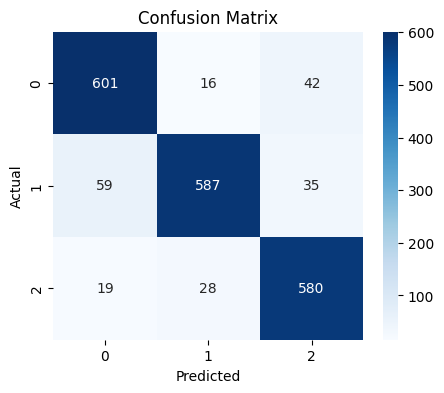

Multiclass AUC Score: 0.9811


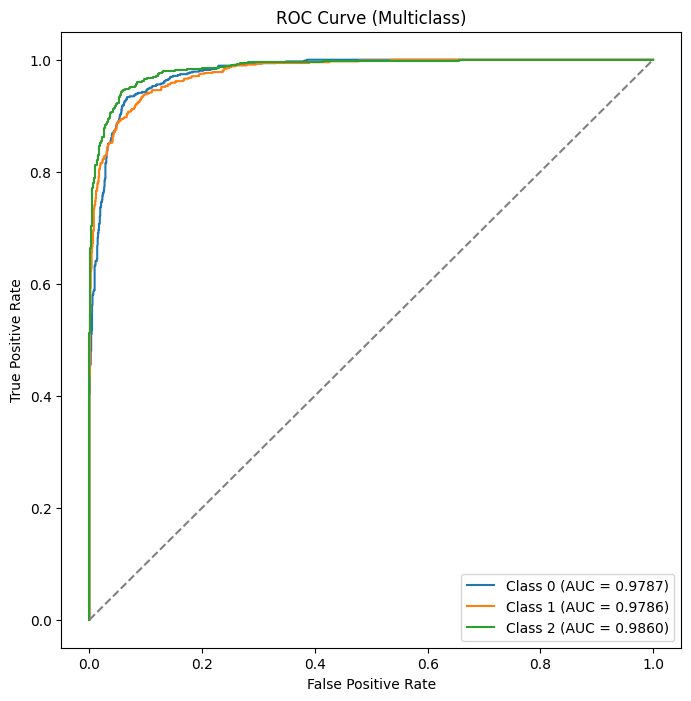

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=200)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on test data
y_pred_RF = rf_classifier.predict(X_test)


# Print classification report
report = classification_report(y_test, y_pred_RF, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df.round(4) * 100)

print("Train Accuracy:", accuracy_score(rf_classifier.predict(X_train), y_train).round(4) * 100)
print("Test Accuracy:", accuracy_score(y_pred_RF, y_test).round(4) * 100)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_RF)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Predict probabilities for AUC and ROC
y_probs_RF = rf_classifier.predict_proba(X_test)  # Probabilities for the positive class

# Calculate AUC score for multiclass
auc_score = roc_auc_score(y_test, y_probs_RF, multi_class='ovr')  # Use 'ovr' or 'ovo'
print(f"Multiclass AUC Score: {auc_score:.4f}")

# Plot ROC Curve for each class
plt.figure(figsize=(8, 8))
for i, class_label in enumerate(rf_classifier.classes_):
    fpr, tpr, _ = roc_curve((y_test == class_label).astype(int), y_probs_RF[:, i])
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc_score((y_test == class_label).astype(int), y_probs_RF[:, i]):.4f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass)')
plt.legend(loc='lower right')
plt.show()

              precision  recall  f1-score    support
0                 71.78   83.00     76.99   65900.00
1                 83.28   73.86     78.29   68100.00
2                 77.54   74.32     75.90   62700.00
accuracy          77.07   77.07     77.07      77.07
macro avg         77.53   77.06     77.06  196700.00
weighted avg      77.60   77.07     77.09  196700.00
Train Accuracy: 84.83000000000001
Test Accuracy: 77.07000000000001
Confusion Matrix:
[[547  36  76]
 [119 503  59]
 [ 96  65 466]]


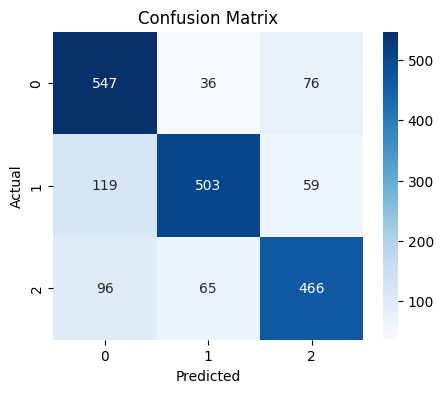

Multiclass AUC Score: 0.9081


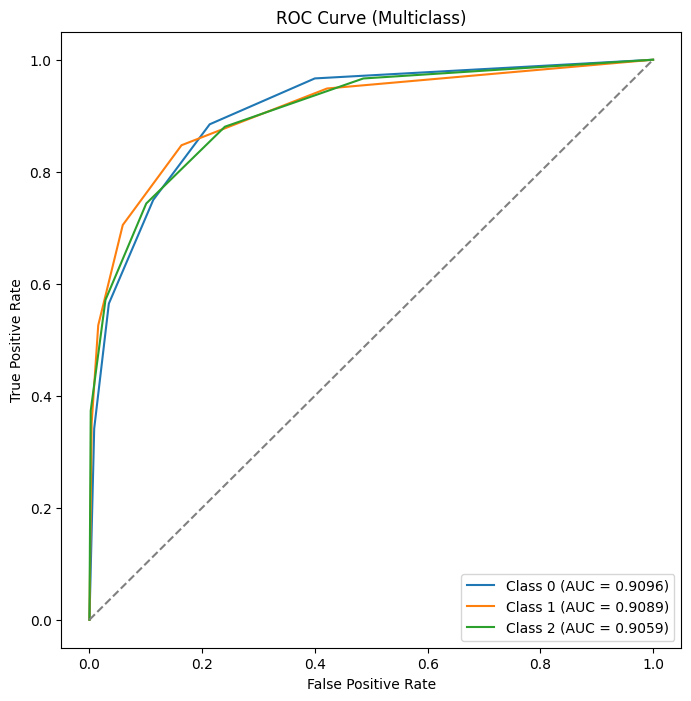

In [28]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_classifier.fit(X_train, y_train)

# Predict on test data
y_pred_KNN = knn_classifier.predict(X_test)

# Print classification report
report = classification_report(y_test, y_pred_KNN, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df.round(4)*100)
print("Train Accuracy:", accuracy_score(knn_classifier.predict(X_train), y_train).round(4)*100)
print("Test Accuracy:", accuracy_score(y_pred_KNN, y_test).round(4)*100)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_KNN)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=knn_classifier.classes_, yticklabels=knn_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Predict probabilities for AUC and ROC
y_probs_KNN = knn_classifier.predict_proba(X_test)  # Probabilities for the positive class

# Calculate AUC score for multiclass
auc_score = roc_auc_score(y_test, y_probs_KNN, multi_class='ovr')  # Use 'ovr' or 'ovo'
print(f"Multiclass AUC Score: {auc_score:.4f}")

# Plot ROC Curve for each class
plt.figure(figsize=(8, 8))
for i, class_label in enumerate(knn_classifier.classes_):
    fpr, tpr, _ = roc_curve((y_test == class_label).astype(int), y_probs_KNN[:, i])
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc_score((y_test == class_label).astype(int), y_probs_KNN[:, i]):.4f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass)')
plt.legend(loc='lower right')
plt.show()

              precision  recall  f1-score    support
0                 85.84   88.32     87.06   65900.00
1                 91.32   85.02     88.06   68100.00
2                 85.50   89.31     87.36   62700.00
accuracy          87.49   87.49     87.49      87.49
macro avg         87.55   87.55     87.49  196700.00
weighted avg      87.63   87.49     87.50  196700.00
Train Accuracy: 99.368
Test Accuracy: 87.49
Confusion Matrix:
[[582  28  49]
 [ 56 579  46]
 [ 40  27 560]]


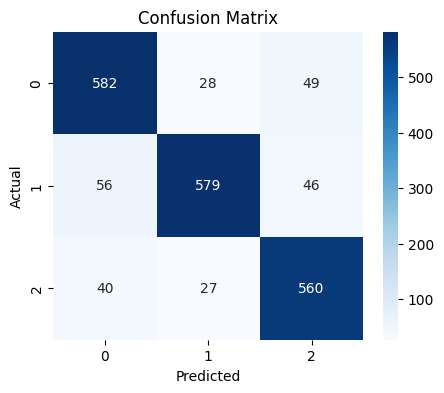

Multiclass AUC Score: 0.9728


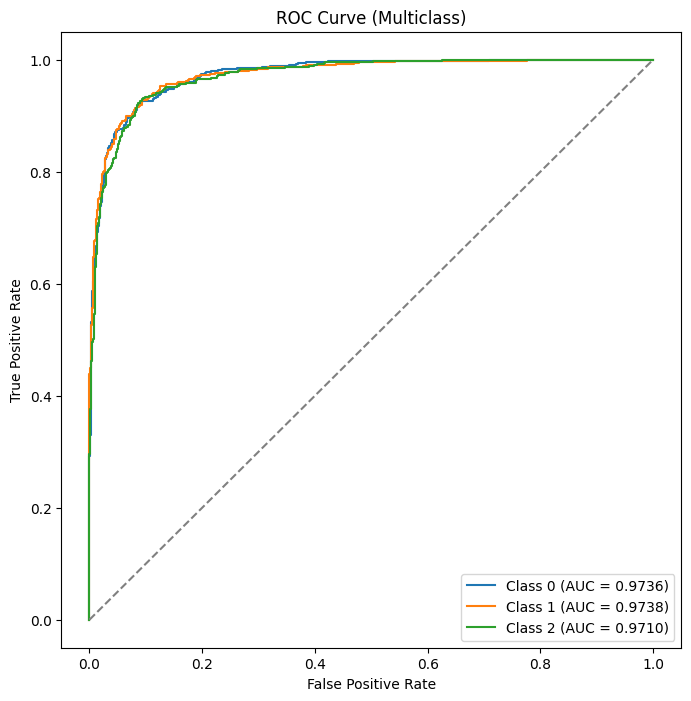

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Initialize the SVM classifier
svm_classifier = SVC(C=10, gamma='scale', kernel='rbf', probability=True)  # You can also try other kernels like 'rbf'

# Train the model
svm_classifier.fit(X_train, y_train)

# Predict on test data
y_pred_SVM = svm_classifier.predict(X_test)

# Compute and display classification report in decimals
report = classification_report(y_test, y_pred_SVM, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df.round(4)*100)

# Display train and test accuracy
print("Train Accuracy:", accuracy_score(svm_classifier.predict(X_train), y_train).round(5)*100)
print("Test Accuracy:", accuracy_score(y_pred_SVM, y_test).round(4)*100)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_SVM)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Predict probabilities for AUC and ROC
y_probs_svm = svm_classifier.predict_proba(X_test)  # Probabilities for the positive class

# Calculate AUC score for multiclass
auc_score = roc_auc_score(y_test, y_probs_svm, multi_class='ovr')  # Use 'ovr' or 'ovo'
print(f"Multiclass AUC Score: {auc_score:.4f}")

# Plot ROC Curve for each class
plt.figure(figsize=(8, 8))
for i, class_label in enumerate(svm_classifier.classes_):
    fpr, tpr, _ = roc_curve((y_test == class_label).astype(int), y_probs_svm[:, i])
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc_score((y_test == class_label).astype(int), y_probs_svm[:, i]):.4f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass)')
plt.legend(loc='lower right')
plt.show()

              precision  recall  f1-score     support
0                77.930  77.693    77.812   65900.000
1                74.504  71.659    73.054   68100.000
2                69.618  72.727    71.139   62700.000
accuracy         74.021  74.021    74.021      74.021
macro avg        74.017  74.027    74.001  196700.000
weighted avg     74.094  74.021    74.037  196700.000
Train Accuracy: 76.42
Test Accuracy: 74.02
Confusion Matrix:
[[512  61  86]
 [ 80 488 113]
 [ 65 106 456]]


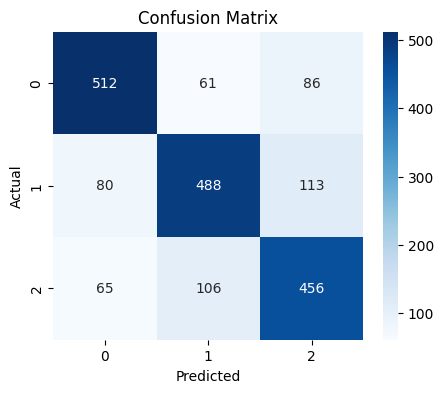

Multiclass AUC Score: 0.8923


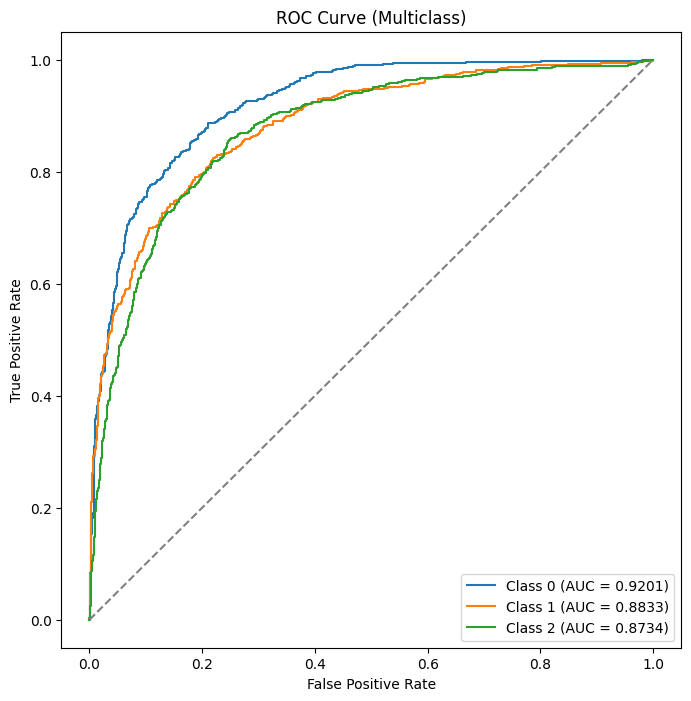

In [37]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
lr_classifier = LogisticRegression(C=10, solver='liblinear')

# Train the model
lr_classifier.fit(X_train, y_train)

# Predict on test data
y_pred_LR = lr_classifier.predict(X_test)

# Print classification report
report = classification_report(y_test, y_pred_LR, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df.round(5)*100)
print("Train Accuracy:", accuracy_score(lr_classifier.predict(X_train), y_train).round(4)*100)
print("Test Accuracy:", accuracy_score(y_pred_LR, y_test).round(4)*100)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_LR)
print("Confusion Matrix:")
print(conf_matrix)
# Visualize the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=lr_classifier.classes_, yticklabels=lr_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Predict probabilities for AUC and ROC
y_probs_lr = lr_classifier.predict_proba(X_test)  # Probabilities for the positive class

# Calculate AUC score for multiclass
auc_score = roc_auc_score(y_test, y_probs_lr, multi_class='ovr')  # Use 'ovr' or 'ovo'
print(f"Multiclass AUC Score: {auc_score:.4f}")

# Plot ROC Curve for each class
plt.figure(figsize=(8, 8))
for i, class_label in enumerate(lr_classifier.classes_):
    fpr, tpr, _ = roc_curve((y_test == class_label).astype(int), y_probs_lr[:, i])
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc_score((y_test == class_label).astype(int), y_probs_lr[:, i]):.4f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass)')
plt.legend(loc='lower right')
plt.show()

              precision  recall  f1-score     support
0                76.190  75.266    75.725   65900.000
1                74.962  71.659    73.273   68100.000
2                71.429  75.758    73.529   62700.000
accuracy         74.174  74.174    74.174      74.174
macro avg        74.194  74.227    74.176  196700.000
weighted avg     74.247  74.174    74.176  196700.000
Train Accuracy: 89.82
Test Accuracy: 74.17
Confusion Matrix:
[[496  73  90]
 [ 93 488 100]
 [ 62  90 475]]


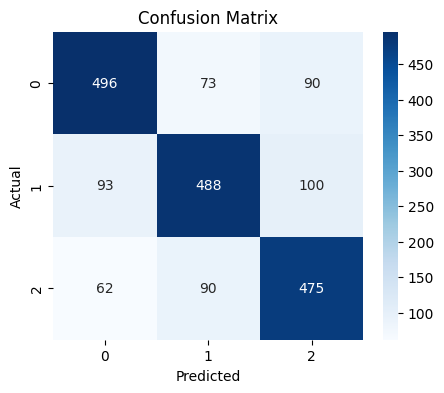

Multiclass AUC Score: 0.8923


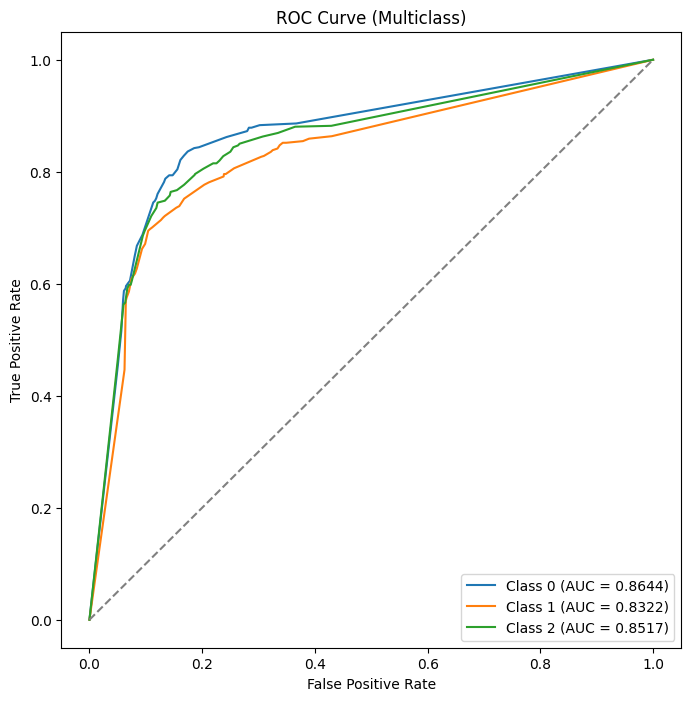

In [38]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=10)

# Train the model
dt_classifier.fit(X_train, y_train)

# Predict on test data
y_pred_DT = dt_classifier.predict(X_test)

# Print classification report
report = classification_report(y_test, y_pred_DT, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df.round(5)*100)
print("Train Accuracy:", accuracy_score(dt_classifier.predict(X_train), y_train).round(4)*100)
print("Test Accuracy:", accuracy_score(y_pred_DT, y_test).round(4)*100)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_DT)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=dt_classifier.classes_, yticklabels=dt_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Predict probabilities for AUC and ROC
y_probs_dt = dt_classifier.predict_proba(X_test)  # Probabilities for the positive class

# Calculate AUC score for multiclass
auc_score = roc_auc_score(y_test, y_probs_lr, multi_class='ovr')  # Use 'ovr' or 'ovo'
print(f"Multiclass AUC Score: {auc_score:.4f}")

# Plot ROC Curve for each class
plt.figure(figsize=(8, 8))
for i, class_label in enumerate(dt_classifier.classes_):
    fpr, tpr, _ = roc_curve((y_test == class_label).astype(int), y_probs_dt[:, i])
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc_score((y_test == class_label).astype(int), y_probs_dt[:, i]):.4f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass)')
plt.legend(loc='lower right')
plt.show()

              precision  recall  f1-score     support
0                78.604  78.604    78.604   65900.000
1                72.996  76.211    74.569   68100.000
2                75.544  71.930    73.693   62700.000
accuracy         75.648  75.648    75.648      75.648
macro avg        75.715  75.582    75.622  196700.000
weighted avg     75.687  75.648    75.642  196700.000
Train Accuracy: 83.41
Test Accuracy: 75.64999999999999


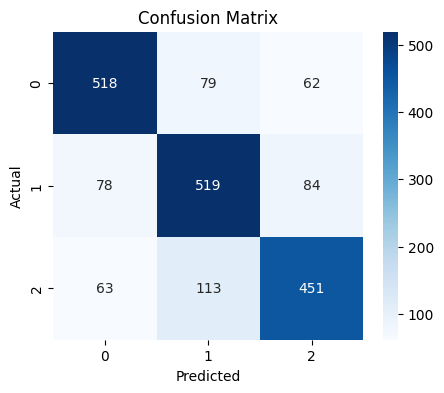

Multiclass AUC Score: 0.8790


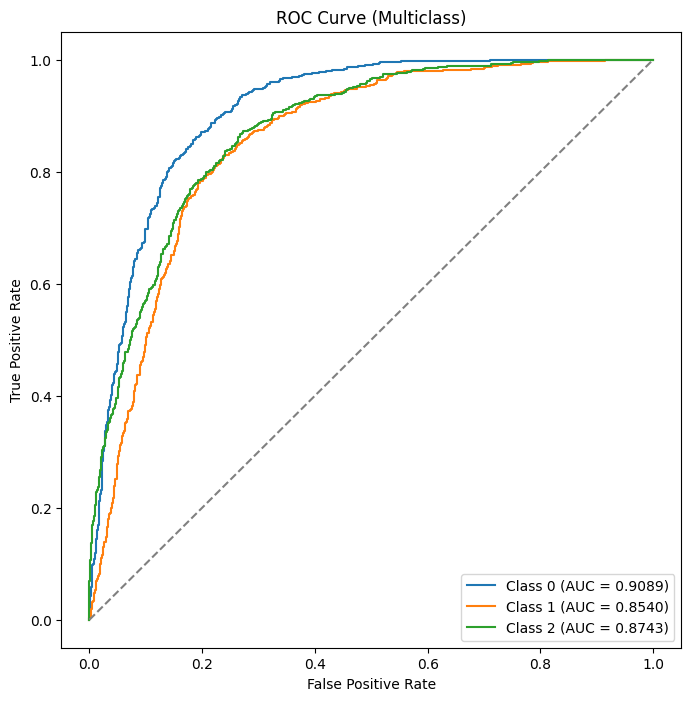

In [32]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost classifier
ada_classifier = AdaBoostClassifier(n_estimators=200, learning_rate=1.0)

# Train the model
ada_classifier.fit(X_train, y_train)

# Predict on test data
y_pred_Ada = ada_classifier.predict(X_test)

# Print classification report
report = classification_report(y_test, y_pred_Ada, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df.round(5)*100)
print("Train Accuracy:", accuracy_score(ada_classifier.predict(X_train), y_train).round(4)*100)
print("Test Accuracy:", accuracy_score(y_pred_Ada, y_test).round(4)*100)

# Visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_Ada)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=ada_classifier.classes_, yticklabels=ada_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Predict probabilities for AUC and ROC
y_probs_ada = ada_classifier.predict_proba(X_test)  # Probabilities for the positive class

# Calculate AUC score for multiclass
auc_score = roc_auc_score(y_test, y_probs_ada, multi_class='ovr')  # Use 'ovr' or 'ovo'
print(f"Multiclass AUC Score: {auc_score:.4f}")

# Plot ROC Curve for each class
plt.figure(figsize=(8, 8))
for i, class_label in enumerate(ada_classifier.classes_):
    fpr, tpr, _ = roc_curve((y_test == class_label).astype(int), y_probs_ada[:, i])
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc_score((y_test == class_label).astype(int), y_probs_ada[:, i]):.4f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass)')
plt.legend(loc='lower right')
plt.show()


In [33]:
# End timing for the entire notebook
notebook_end_time = time.time()

In [34]:
# Compute execution time for counted cells
counted_execution_time = (notebook_end_time - notebook_start_time) - excluded_time
remaining_execution_time = notebook_end_time - remaining_start_time

# Display results
print(f"Total execution time (excluding skipped cell): {counted_execution_time:.2f} seconds")
print(f"Execution time for remaining cells: {remaining_execution_time:.2f} seconds")

Total execution time (excluding skipped cell): 2680.97 seconds
Execution time for remaining cells: 94.01 seconds


In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

print("Accuracy KNN: {:.5f}".format(accuracy_score(y_pred_KNN, y_test)))
print("Accuracy DT: {:.5f}".format(accuracy_score(y_pred_DT, y_test)))
print("Accuracy LR: {:.5f}".format(accuracy_score(y_pred_LR, y_test)))
# print("Accuracy NB: {:.2f}".format(accuracy_score(y_pred_NB, y_test)))
print("Accuracy SVM: {:.5f}".format(accuracy_score(y_pred_SVM, y_test)))
print("Accuracy RF: {:.5f}".format(accuracy_score(y_pred_RF, y_test)))
print("Accuracy ADA_B: {:.2f}".format(accuracy_score(y_pred_Ada, y_test)))
# print("Accuracy GB: {:.2f}".format(accuracy_score(y_pred_GB, y_test)))

Accuracy KNN: 0.77072
Accuracy DT: 0.73259
Accuracy LR: 0.74581
Accuracy SVM: 0.87494
Accuracy RF: 0.89629
Accuracy ADA_B: 0.76
